In [2]:
% matplotlib inline
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [11]:
def kl_divergence(p,p_hat,eps = 1e-7):
    p_0 = tf.clip_by_value(p,eps,1)
    p_1 = tf.clip_by_value(1-p,eps,1)
    p_hat_0 = tf.clip_by_value(p_hat,eps,1)
    p_hat_1 = tf.clip_by_value(1-p_hat,eps,1)
    
    res = p_0 * (tf.log(p_0)-tf.log(p_hat_0)) + p_1 * (tf.log(p_1)-tf.log(p_hat_1))
    res = tf.reduce_mean(res)
    return res

In [4]:
mnist = input_data.read_data_sets('E:/mnist/MNIST_data',one_hot = "True")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:/mnist/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:/mnist/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting E:/mnist/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting E:/mnist/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [18]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape = [None,784],dtype = tf.float32)
    hidden = tf.keras.layers.Dense(32,activation = tf.nn.sigmoid)(inputs)
    output = tf.keras.layers.Dense(784,activation = tf.nn.sigmoid)(hidden)
    losses = kl_divergence(0.1,hidden)
    loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(inputs,output) + 0.1*losses
)
    saver = tf.train.Saver()

0.26886308


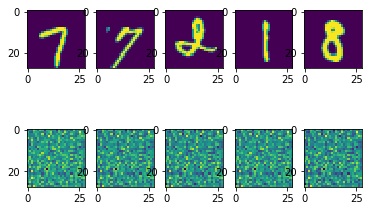

0.26875675


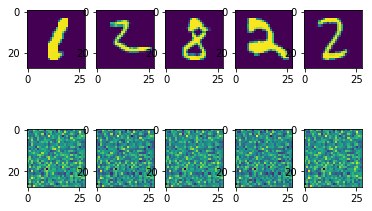

0.2682077


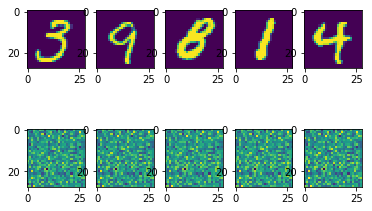

In [19]:
with tf.Session(graph = g) as sess:
    optim = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        batch_img,_ = mnist.train.next_batch(32)
        res_loss = sess.run(loss,feed_dict = {inputs:batch_img})
        if i %2000==0:
            print(res_loss)
            batch_img,_ = mnist.test.next_batch(5)
            res_output = sess.run(output,feed_dict = {inputs:batch_img})
            for j in range(10):
                plt.subplot(2,5,j+1)
                img = batch_img[j] if j<5 else res_output[j-5]
                img = (img*255).astype(np.uint8).reshape([28,28])
                plt.imshow(img)
            plt.show()